# Logfile analyser and visualiser

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

Importing the necesary libary's to make this project possible
* Pandas is used for data manipulation and handeling(might be changed to polars soon)
* networkx is used to make visuals for the relation between ip adresses(is still work in porgress and thus dont know if i will keel it in)
* matplotlib is used to make the plots 

In [2]:
df = pd.read_csv("E:\Programmeren\Tarball analyse\merged.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\jelle\AppData\Local\Temp\ipykernel_15876\3847094896.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("E:\Programmeren\Tarball analyse\merged.csv")


,Unnamed: 0.1,time,state,message,Unnamed: 0
0,0,15:57:34,STAT,Starting FairMQ state machine,0.0
1,1,15:57:35,DEBU,Requesting 'zeromq' as default transport for t...,1.0
2,2,15:57:35,DEBU,"Transport: Using ZeroMQ library, version: 4.2.0",2.0
3,3,15:57:35,DEBU,Adding 'zeromq' transport to the device.,3.0
4,4,15:57:35,STAT,Entering INITIALIZING DEVICE state,4.0
...,...,...,...,...,...
28188318,28188318,07:59:42,INFO,Timeframe #17303 received from 172.20.22.31 a...,440029.0
28188319,28188319,07:59:42,INFO,Timeframe #17304 received from 172.20.22.31 a...,440030.0
28188320,28188320,07:59:42,INFO,Timeframe #17305 received from 172.20.22.31 a...,440031.0
28188321,28188321,07:59:42,INFO,Timeframe #17306 received from 172.20.22.31 a...,440032.0


Read the .csv file using pandas. and note that i used a file called merged.csv. That is because i had a few 100 .log files and i put them into 1 file for easy handeling and faster processing.
See the other .py code in my repo for the code to combine those files

In [3]:
row, column = df.shape
print(f"rows: {row}, columns: {column}")

rows: 28188323, columns: 5


This is a massive file(no wonder my pc took its time processing all the .log files into 1 csv ;))
It has 28+ million rows
and only 5 columns.

In [4]:
df = df.drop("Unnamed: 0.1", axis=1)
df = df.drop("Unnamed: 0", axis=1)

2 of the 5 columns did not survive and got dropped due to useless info

In [5]:
df

,time,state,message
0,15:57:34,STAT,Starting FairMQ state machine
1,15:57:35,DEBU,Requesting 'zeromq' as default transport for t...
2,15:57:35,DEBU,"Transport: Using ZeroMQ library, version: 4.2.0"
3,15:57:35,DEBU,Adding 'zeromq' transport to the device.
4,15:57:35,STAT,Entering INITIALIZING DEVICE state
...,...,...,...
28188318,07:59:42,INFO,Timeframe #17303 received from 172.20.22.31 a...
28188319,07:59:42,INFO,Timeframe #17304 received from 172.20.22.31 a...
28188320,07:59:42,INFO,Timeframe #17305 received from 172.20.22.31 a...
28188321,07:59:42,INFO,Timeframe #17306 received from 172.20.22.31 a...


Show the df

In [6]:
df.max(axis=0)["time"]

'23:54:51'

Check what was the lates time a packet was recieved

In [7]:
df.min(axis=0)["time"]

'00:03:01'

Check what was the earliest time a packet was recieved

In [8]:
test = df.loc[df["message"].str.contains("Timeframe")]
test

,time,state,message
28,15:57:40,INFO,Timeframe #239 received from 172.20.22.20 ack...
29,15:57:40,INFO,Timeframe #233 received from 172.20.22.26 ack...
30,15:57:40,INFO,Timeframe #242 received from 172.20.22.29 ack...
31,15:57:40,INFO,Timeframe #251 received from 172.20.22.20 ack...
32,15:57:41,INFO,Timeframe #237 received from 172.20.22.22 ack...
...,...,...,...
28188318,07:59:42,INFO,Timeframe #17303 received from 172.20.22.31 a...
28188319,07:59:42,INFO,Timeframe #17304 received from 172.20.22.31 a...
28188320,07:59:42,INFO,Timeframe #17305 received from 172.20.22.31 a...
28188321,07:59:42,INFO,Timeframe #17306 received from 172.20.22.31 a...


Check every row to see if the string contaisn `Timeframe`. I want that so that i can seperate that string into more usefull columns

In [9]:
test[["Type", "ID", "IP", "time1", "time_value"]] = test["message"].str.extract(r"(Timeframe)\s+#(\d+).*?(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}).*?(\d+)\s+([a-zA-ZÎ¼s]+)")
test["time"] = df["time"]

C:\Users\jelle\AppData\Local\Temp\ipykernel_15876\1551407146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[["Type", "ID", "IP", "time1", "time_value"]] = test["message"].str.extract(r"(Timeframe)\s+#(\d+).*?(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}).*?(\d+)\s+([a-zA-ZÎ¼s]+)")
C:\Users\jelle\AppData\Local\Temp\ipykernel_15876\1551407146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[["Type", "ID", "IP", "time1", "time_value"]] = test["message"].str.extract(r"(Timeframe)\s+#(\d+).*?(\d{1,3}\.\d

Using regex to strip the string into some usefull parts.
* The `type` column has `Timeframe`
* The `ID` column, well you guesed it. Has the ID of the Timeframe
* The `IP` column has the ip
* the `time` column has the time of the entry being put in the log file
* the `time_value` column has this weird character: Î¼s indicating that the time is in micro seconds i think

In [10]:
test

,time,state,message,Type,ID,IP,time1,time_value
28,15:57:40,INFO,Timeframe #239 received from 172.20.22.20 ack...,Timeframe,239,172.20.22.20,980783,Î¼s
29,15:57:40,INFO,Timeframe #233 received from 172.20.22.26 ack...,Timeframe,233,172.20.22.26,1147507,Î¼s
30,15:57:40,INFO,Timeframe #242 received from 172.20.22.29 ack...,Timeframe,242,172.20.22.29,1041694,Î¼s
31,15:57:40,INFO,Timeframe #251 received from 172.20.22.20 ack...,Timeframe,251,172.20.22.20,863585,Î¼s
32,15:57:41,INFO,Timeframe #237 received from 172.20.22.22 ack...,Timeframe,237,172.20.22.22,1191617,Î¼s
...,...,...,...,...,...,...,...,...
28188318,07:59:42,INFO,Timeframe #17303 received from 172.20.22.31 a...,Timeframe,17303,172.20.22.31,78060946,Î¼s
28188319,07:59:42,INFO,Timeframe #17304 received from 172.20.22.31 a...,Timeframe,17304,172.20.22.31,78072833,Î¼s
28188320,07:59:42,INFO,Timeframe #17305 received from 172.20.22.31 a...,Timeframe,17305,172.20.22.31,78079380,Î¼s
28188321,07:59:42,INFO,Timeframe #17306 received from 172.20.22.31 a...,Timeframe,17306,172.20.22.31,78100223,Î¼s


In [11]:
test["IP"].unique()

array(['172.20.22.20', '172.20.22.26', '172.20.22.29', '172.20.22.22',
       '172.20.22.24', '172.20.22.25', '172.20.22.31', '172.20.22.23',
       '172.20.22.27', '172.20.22.28', '172.20.22.30', '172.20.22.21'],
      dtype=object)

Get all the unique ip's that are in the data to get a better understanding of the ip's used

In [12]:

df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df["time"].dtypes
# df

dtype('<M8[ns]')

In [13]:
df.groupby(pd.Grouper(key="time", freq="10Min")).head()

,time,state,message
13041599,1900-01-01 00:03:01,STAT,Starting FairMQ state machine
13041600,1900-01-01 00:03:01,DEBU,Requesting 'zeromq' as default transport for t...
13041601,1900-01-01 00:03:01,DEBU,"Transport: Using ZeroMQ library, version: 4.2.0"
13041602,1900-01-01 00:03:01,DEBU,Adding 'zeromq' transport to the device.
13041603,1900-01-01 00:03:01,STAT,Entering INITIALIZING DEVICE state
...,...,...,...
12819287,1900-01-01 23:50:00,INFO,Timeframe #6668 received from 172.20.22.27 ac...
12819288,1900-01-01 23:50:00,INFO,Timeframe #6723 received from 172.20.22.28 ac...
12819289,1900-01-01 23:50:00,INFO,Timeframe #6726 received from 172.20.22.25 ac...
12819290,1900-01-01 23:50:00,INFO,Timeframe #6672 received from 172.20.22.31 ac...


In [14]:
test1 = df.loc[~df["message"].str.contains("Timeframe")]
test1 = df.loc[df["state"].str.contains("DEBU")]
test1

,time,state,message
1,1900-01-01 15:57:35,DEBU,Requesting 'zeromq' as default transport for t...
2,1900-01-01 15:57:35,DEBU,"Transport: Using ZeroMQ library, version: 4.2.0"
3,1900-01-01 15:57:35,DEBU,Adding 'zeromq' transport to the device.
5,1900-01-01 15:57:35,DEBU,"Validating channel ""ack[0]""... VALID"
6,1900-01-01 15:57:35,DEBU,ack[0]: using default transport
...,...,...,...
28188255,1900-01-01 07:59:39,DEBU,"stf1[0]: in: 0 msg (0 MB), out: 50 msg (0.0001..."
28188284,1900-01-01 07:59:40,DEBU,"ack[0]: in: 28 msg (0.000504 MB), out: 0 msg (..."
28188285,1900-01-01 07:59:40,DEBU,"stf1[0]: in: 0 msg (0 MB), out: 50 msg (0.0001..."
28188312,1900-01-01 07:59:41,DEBU,"ack[0]: in: 26 msg (0.000468 MB), out: 0 msg (..."


In [15]:
test1.head(10)

,time,state,message
1,1900-01-01 15:57:35,DEBU,Requesting 'zeromq' as default transport for t...
2,1900-01-01 15:57:35,DEBU,"Transport: Using ZeroMQ library, version: 4.2.0"
3,1900-01-01 15:57:35,DEBU,Adding 'zeromq' transport to the device.
5,1900-01-01 15:57:35,DEBU,"Validating channel ""ack[0]""... VALID"
6,1900-01-01 15:57:35,DEBU,ack[0]: using default transport
7,1900-01-01 15:57:35,DEBU,Attached channel ack[0] to tcp://172.20.22.17:...
8,1900-01-01 15:57:35,DEBU,"Validating channel ""stf1[0]""... VALID"
9,1900-01-01 15:57:35,DEBU,stf1[0]: using default transport
10,1900-01-01 15:57:35,DEBU,Attached channel stf1[0] to tcp://172.20.22.17...
16,1900-01-01 15:57:35,DEBU,"ack[0]: in: -nan msg (-nan MB), out: -nan msg ..."


In [16]:
ip_dict = {}

In [35]:
ips = test["IP"].unique()
ips

array(['172.20.22.20', '172.20.22.26', '172.20.22.29', '172.20.22.22',
       '172.20.22.24', '172.20.22.25', '172.20.22.31', '172.20.22.23',
       '172.20.22.27', '172.20.22.28', '172.20.22.30', '172.20.22.21'],
      dtype=object)

In [18]:
G = nx.Graph()
G.add_node("me")

In [19]:
number = 0
for ip in ips:
    ip_dict[number] = ip
    G.add_node(number)
    G.add_edge("me", number)
    number += 1
ip_dict["me"] = "Root"
print(ip_dict)

{0: '172.20.22.20', 1: '172.20.22.26', 2: '172.20.22.29', 3: '172.20.22.22', 4: '172.20.22.24', 5: '172.20.22.25', 6: '172.20.22.31', 7: '172.20.22.23', 8: '172.20.22.27', 9: '172.20.22.28', 10: '172.20.22.30', 11: '172.20.22.21', 'me': 'Root'}


In [20]:
node_list = G.nodes()
print(node_list)


['me', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


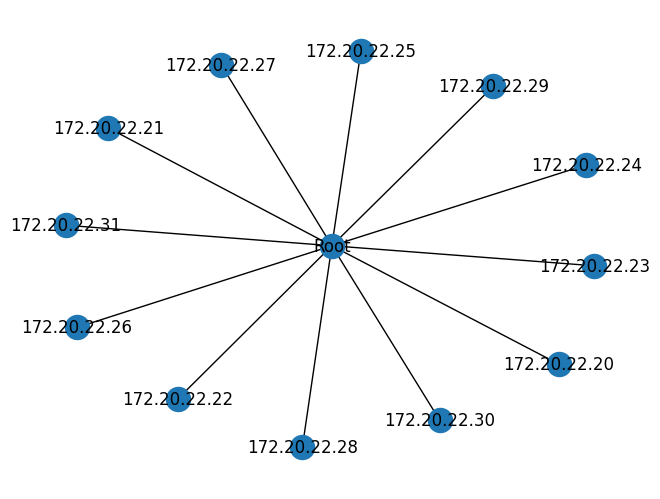

In [21]:
for node in range(len(node_list)-1):
    G.add_edge("me", node)
    
nx.draw(G, with_labels=True, labels=ip_dict)

In [29]:
ip_counts = test.groupby("IP").size().reset_index(name='Count')
ip_counts

,IP,Count
0,172.20.22.20,370693
1,172.20.22.21,510571
2,172.20.22.22,666705
3,172.20.22.23,839441
4,172.20.22.24,1035525
5,172.20.22.25,1256800
6,172.20.22.26,1517510
7,172.20.22.27,1826279
8,172.20.22.28,2211048
9,172.20.22.29,2726402


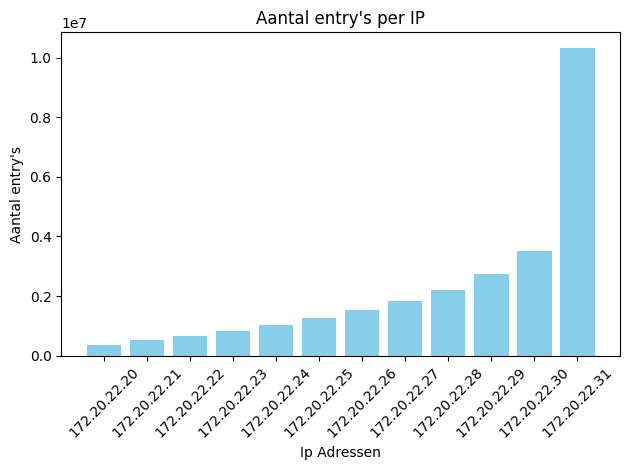

In [30]:
fig, ax = plt.subplots()
ax.bar(ip_counts['IP'], ip_counts['Count'], label = ip_counts['IP'].tolist(), color="skyblue")
plt.xticks(rotation=45)
ax.set_xlabel("Ip Adressen")
ax.set_ylabel("Aantal entry's")
ax.set_title("Aantal entry's per IP")
plt.tight_layout()
plt.show()

In [31]:
stat = df[df["state"] == "STAT"]
stat

,time,state,message
0,1900-01-01 15:57:34,STAT,Starting FairMQ state machine
4,1900-01-01 15:57:35,STAT,Entering INITIALIZING DEVICE state
11,1900-01-01 15:57:35,STAT,Entering DEVICE READY state
12,1900-01-01 15:57:35,STAT,Entering INITIALIZING TASK state
13,1900-01-01 15:57:35,STAT,Entering READY state
...,...,...,...
28170740,1900-01-01 07:52:34,STAT,Entering INITIALIZING DEVICE state
28170747,1900-01-01 07:52:34,STAT,Entering DEVICE READY state
28170748,1900-01-01 07:52:34,STAT,Entering INITIALIZING TASK state
28170749,1900-01-01 07:52:34,STAT,Entering READY state


In [32]:
stat.groupby("message").size()

message
Entering DEVICE READY state           1600
Entering INITIALIZING DEVICE state    1600
Entering INITIALIZING TASK state      1600
Entering READY state                  1600
Entering RUNNING state                1600
Starting FairMQ state machine         1600
dtype: int64

In [ ]:
fig, ax = plt.subplots()
ax.bar(ip_counts['IP'], ip_counts['Count'], label = ip_counts['IP'].tolist(), color="skyblue")
plt.xticks(rotation=45)
ax.set_xlabel("Ip Adressen")
ax.set_ylabel("Aantal entry's")
ax.set_title("Aantal entry's per IP")
plt.tight_layout()
plt.show()

In [33]:
debug = df[df["state"] == "DEBU"]
debug

,time,state,message
1,1900-01-01 15:57:35,DEBU,Requesting 'zeromq' as default transport for t...
2,1900-01-01 15:57:35,DEBU,"Transport: Using ZeroMQ library, version: 4.2.0"
3,1900-01-01 15:57:35,DEBU,Adding 'zeromq' transport to the device.
5,1900-01-01 15:57:35,DEBU,"Validating channel ""ack[0]""... VALID"
6,1900-01-01 15:57:35,DEBU,ack[0]: using default transport
...,...,...,...
28188255,1900-01-01 07:59:39,DEBU,"stf1[0]: in: 0 msg (0 MB), out: 50 msg (0.0001..."
28188284,1900-01-01 07:59:40,DEBU,"ack[0]: in: 28 msg (0.000504 MB), out: 0 msg (..."
28188285,1900-01-01 07:59:40,DEBU,"stf1[0]: in: 0 msg (0 MB), out: 50 msg (0.0001..."
28188312,1900-01-01 07:59:41,DEBU,"ack[0]: in: 26 msg (0.000468 MB), out: 0 msg (..."


In [34]:
debug.groupby("message").size()

message
Adding 'zeromq' transport to the device.                          1600
Attached channel ack[0] to tcp://172.20.22.17:5990 (bind)         1600
Attached channel stf1[0] to tcp://172.20.22.17:5550 (bind)        1600
Requesting 'zeromq' as default transport for the device           1600
Transport: Using ZeroMQ library, version: 4.2.0                   1600
                                                                 ...  
stf1[0]: in: 0 msg (0 MB), out: 48.9022 msg (9.78044e-05 MB)        24
stf1[0]: in: 0 msg (0 MB), out: 48.951 msg (9.79021e-05 MB)         34
stf1[0]: in: 0 msg (0 MB), out: 49 msg (9.8e-05 MB)             265241
stf1[0]: in: 0 msg (0 MB), out: 50 msg (0.0001 MB)              418292
stf1[0]: using default transport                                  1600
Length: 532, dtype: int64

In [37]:
test

,time,state,message,Type,ID,IP,time1,time_value
28,15:57:40,INFO,Timeframe #239 received from 172.20.22.20 ack...,Timeframe,239,172.20.22.20,980783,Î¼s
29,15:57:40,INFO,Timeframe #233 received from 172.20.22.26 ack...,Timeframe,233,172.20.22.26,1147507,Î¼s
30,15:57:40,INFO,Timeframe #242 received from 172.20.22.29 ack...,Timeframe,242,172.20.22.29,1041694,Î¼s
31,15:57:40,INFO,Timeframe #251 received from 172.20.22.20 ack...,Timeframe,251,172.20.22.20,863585,Î¼s
32,15:57:41,INFO,Timeframe #237 received from 172.20.22.22 ack...,Timeframe,237,172.20.22.22,1191617,Î¼s
...,...,...,...,...,...,...,...,...
28188318,07:59:42,INFO,Timeframe #17303 received from 172.20.22.31 a...,Timeframe,17303,172.20.22.31,78060946,Î¼s
28188319,07:59:42,INFO,Timeframe #17304 received from 172.20.22.31 a...,Timeframe,17304,172.20.22.31,78072833,Î¼s
28188320,07:59:42,INFO,Timeframe #17305 received from 172.20.22.31 a...,Timeframe,17305,172.20.22.31,78079380,Î¼s
28188321,07:59:42,INFO,Timeframe #17306 received from 172.20.22.31 a...,Timeframe,17306,172.20.22.31,78100223,Î¼s


In [41]:
test["time1"].unique()

array(['980783', '1147507', '1041694', ..., '78079380', '78100223',
       '78135913'], dtype=object)